#Fashion Classification


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

#Load dataset

In [3]:
(X_train , y_train),(X_test , y_test)=keras.datasets.fashion_mnist.load_data()

In [4]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape , y_test.shape

((10000, 28, 28), (10000,))

In [6]:
y_train[0]

9

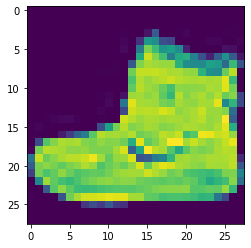

In [7]:
plt.imshow(X_train[0])

In [8]:
  class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

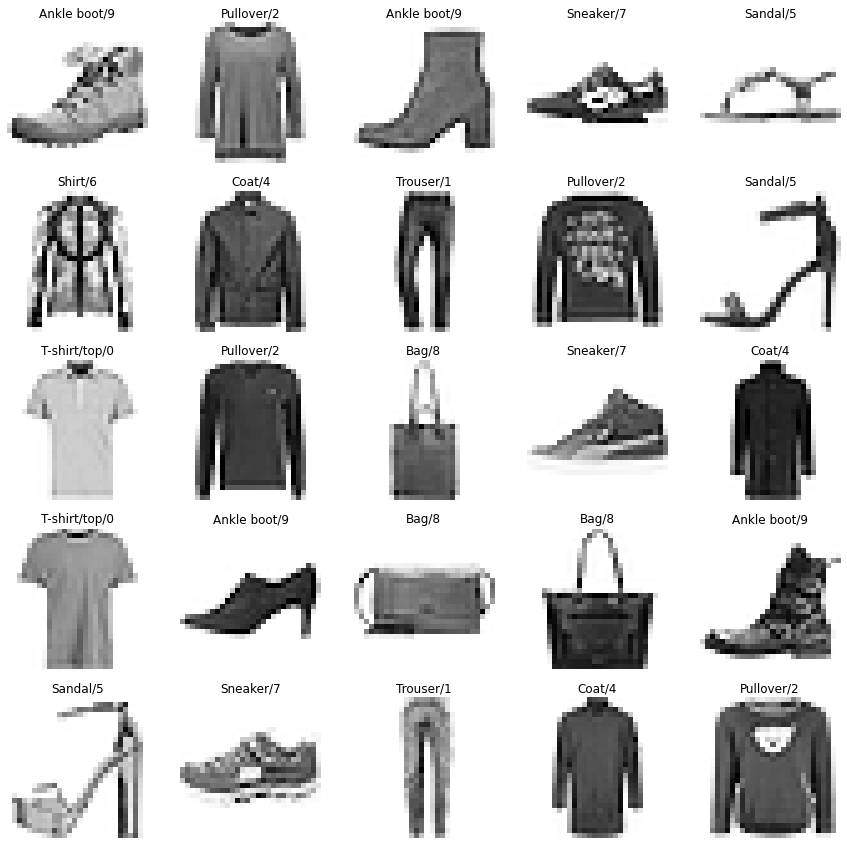

In [9]:
plt.figure(figsize=(15,15))

j = 1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
  plt.title('{}/{}'.format(class_labels[y_train[i]] , y_train[i]))


#Change Dimention

In [10]:
X_train.ndim

3

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_train.ndim

4

#Feature Scalling

In [15]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train[0]

#Split Dataset

In [20]:
from sklearn.model_selection import train_test_split
x_train , x_val,Y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state = 2020)

In [21]:
x_train.shape

(48000, 28, 28, 1)

#CNN Model

In [50]:
model = keras.models.Sequential([
      keras.layers.Conv2D(filters=32,kernel_size=3 ,strides=(1, 1),padding='valid',activation='relu',input_shape = [28,28,1]),
      keras.layers.MaxPool2D(pool_size=(2,2)), #Down Sampling
      keras.layers.Conv2D(filters=64 , kernel_size=3 ,strides=(2,2),padding='same',activation='relu'),
      keras.layers.MaxPool2D(pool_size = (2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense(units=128 , activation='relu'),
      keras.layers.Dropout(0.25),
      keras.layers.Dense(units=256 , activation='relu'),
      keras.layers.Dropout(0.25),
      keras.layers.Dense(units=128 , activation='relu'),
      keras.layers.Dense(units=10 , activation='softmax')

])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               73856     
_________________________________________________________________
dropout (Dropout)            (None, 128)              

In [52]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [56]:
model.fit(x_train,Y_train,epochs=50 ,batch_size=512 , verbose=1, validation_data=(x_val,y_val))

Epoch 1/50
94/94 [==============================] - 1s 10ms/step - loss: 0.0274 - accuracy: 0.9903 - val_loss: 0.5577 - val_accuracy: 0.9088
Epoch 2/50
94/94 [==============================] - 1s 9ms/step - loss: 0.0272 - accuracy: 0.9900 - val_loss: 0.5947 - val_accuracy: 0.9078
Epoch 3/50
94/94 [==============================] - 1s 9ms/step - loss: 0.0244 - accuracy: 0.9913 - val_loss: 0.5827 - val_accuracy: 0.9083
Epoch 4/50
94/94 [==============================] - 1s 9ms/step - loss: 0.0312 - accuracy: 0.9886 - val_loss: 0.5326 - val_accuracy: 0.9088
Epoch 5/50
94/94 [==============================] - 1s 9ms/step - loss: 0.0269 - accuracy: 0.9905 - val_loss: 0.5615 - val_accuracy: 0.9093
Epoch 6/50
94/94 [==============================] - 1s 9ms/step - loss: 0.0271 - accuracy: 0.9899 - val_loss: 0.5850 - val_accuracy: 0.9103
Epoch 7/50
94/94 [==============================] - 1s 9ms/step - loss: 0.0268 - accuracy: 0.9901 - val_loss: 0.5573 - val_accuracy: 0.9078
Epoch 8/50
94/94 [=

#Test The model

In [57]:
model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [58]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

9

In [59]:
y_test[0]

9

In [60]:
y_pred = model.predict(X_test).round(2)
y_pred

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.23, 0.01, 0.  ]], dtype=float32)

In [61]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5928 - accuracy: 0.9043


[0.5928002595901489, 0.9042999744415283]

#Visualize Output

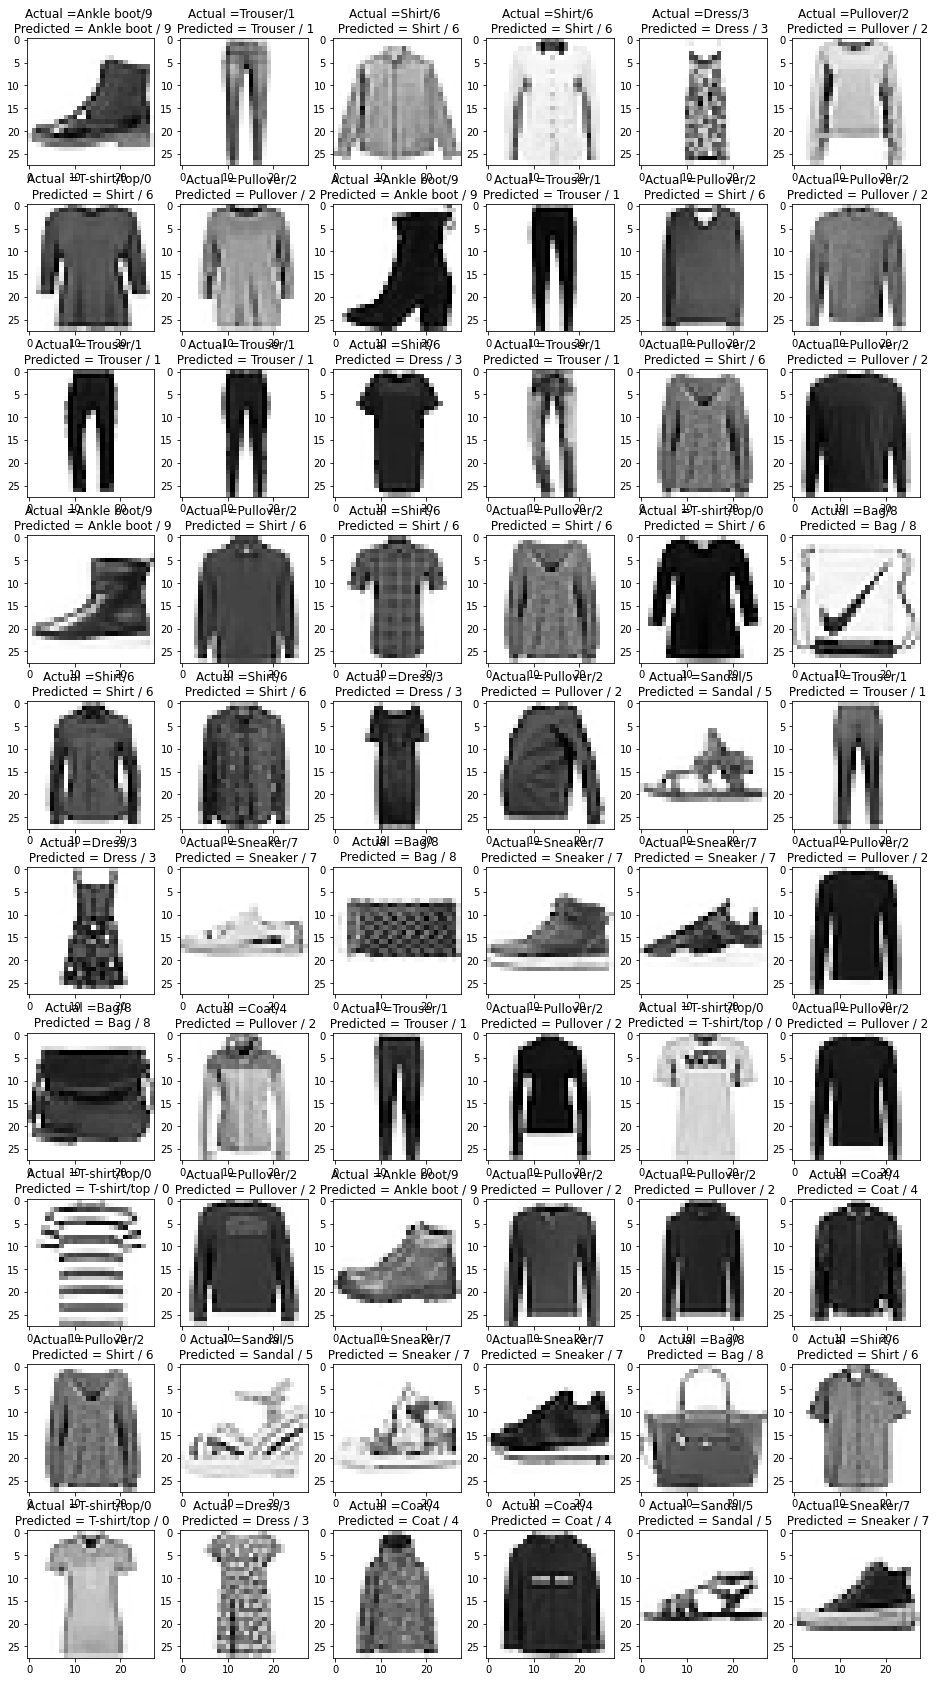

In [62]:
plt.figure(figsize=(16,30))

j = 1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(X_test[i].reshape(28,28) , cmap = 'Greys')
  plt.title('Actual ={}/{} \n Predicted = {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))

#Confusion Matrix

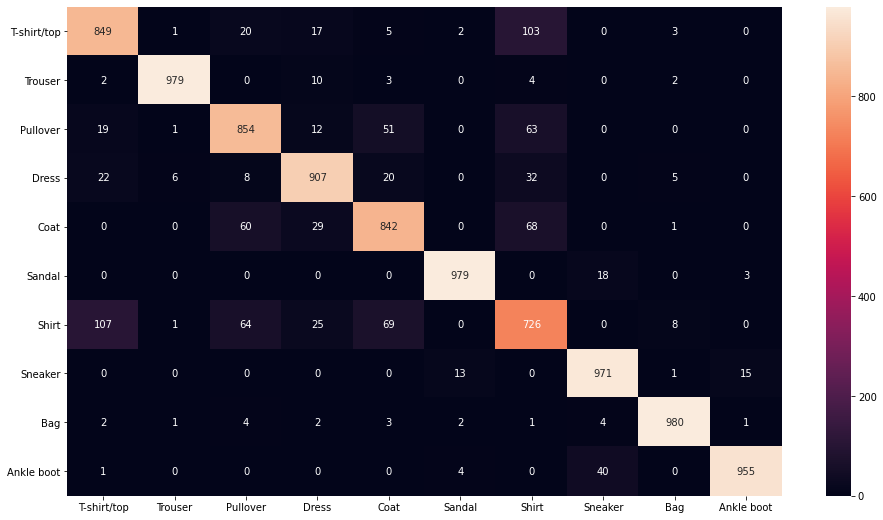

In [63]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_lable = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test , y_pred_lable)
sns.heatmap(cm , annot=True ,fmt='d' ,xticklabels=class_labels , yticklabels=class_labels)

In [64]:
from sklearn.metrics import classification_report
cr = classification_report(y_test , y_pred_lable , target_names = class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.85      0.85      0.85      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.85      0.84      0.84      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.73      0.73      0.73      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



#Save Model

In [65]:
path = ('/content/drive/MyDrive/Models/fashion_classification_cnn_model.h5')

In [66]:
model.save(path)

##Load models

In [67]:
model_deploy = keras.models.load_model('/content/drive/MyDrive/Models/fashion_classification_cnn_model.h5')

In [68]:
model_deploy.predict(X_test).round(2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.23, 0.01, 0.  ]], dtype=float32)